In [1]:
import matplotlib.pyplot as plt
import numpy as np

from FastBeamformer import ReadSignals, LFM, CorrectGroupDelay, HilbertTransform, MatchFilter, CreatePixelSpace, Generate_Coordinates, Beamform

In [2]:
# Specify the folder containing your CSV files
folder_path = "./2D_data/Test_run_360/2024_08_03-16_01_05"
background_path = "./2D_data/Test_run_background/2024_08_03-15_43_20"

background = ReadSignals(background_path)
mean_background = np.mean(background, axis=0)

data_array = ReadSignals(folder_path)

bg_sub_data = data_array - mean_background
print(bg_sub_data.shape)


(360, 1000)


In [3]:
f_start = 10000.0
f_stop = 30000.0
fs = 100000.0
sweep_time = 0.001
A = 1.0

LFM = LFM(f_start, f_stop, fs, sweep_time, A)

In [4]:
analytical_data= []
for i in range(bg_sub_data.shape[0]):
    analytical_data.append(MatchFilter(HilbertTransform(CorrectGroupDelay(bg_sub_data[i], 62.3, 100000.0)), LFM))

analytical_data = np.array(analytical_data)


In [5]:
pixel_space = CreatePixelSpace(-0.2, 0.2, -0.2, 0.2, 150, 0.0)
tx_coordinates = Generate_Coordinates(0.63, 0.23)
rx_coordinates = Generate_Coordinates(0.63, 0.22)

print(pixel_space.shape, tx_coordinates.shape, rx_coordinates.shape)

(22500, 3) (360, 3) (360, 3)


In [6]:
number_of_pixels = pixel_space.shape[0]
n_sensor_positions = tx_coordinates.shape[0]
speed_of_sound = 344.351
bins = bg_sub_data.shape[1] #1000

beamform_complex = Beamform(pixel_space.flatten(), tx_coordinates.flatten(), rx_coordinates.flatten(), analytical_data.flatten(),
                            number_of_pixels, n_sensor_positions, speed_of_sound, fs, bins)

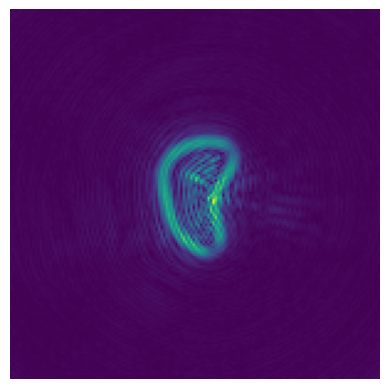

In [7]:
image = np.abs(beamform_complex)
image = np.reshape(image, (150, 150))

plt.imshow(image)
plt.axis('off')
plt.show()